In [1]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load and Preprocess Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Define the CNN Model with Dropout, Optimizer, and Filters
model = models.Sequential([
 layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32,
3)),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(64, (3, 3), activation='relu'),
 layers.MaxPooling2D((2, 2)),
 layers.Conv2D(128, (3, 3), activation='relu'),
 layers.Flatten(),
 layers.Dropout(0.5),
 layers.Dense(128, activation='relu'),
 layers.Dense(10, activation='softmax')
])
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Train the model
history = model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_data=(x_test, y_test_cat))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 59ms/step - accuracy: 0.3359 - loss: 1.7833 - val_accuracy: 0.5378 - val_loss: 1.2787
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step - accuracy: 0.5523 - loss: 1.2528 - val_accuracy: 0.6265 - val_loss: 1.0527
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.6158 - loss: 1.0847 - val_accuracy: 0.6509 - val_loss: 1.0034
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.6538 - loss: 0.9849 - val_accuracy: 0.6919 - val_loss: 0.8741
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 51ms/step - accuracy: 0.6827 - loss: 0.9020 - val_accuracy: 0.7027 - val_loss: 0.8635


In [5]:
# Evaluate the model
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()
print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       0.70      0.78      0.74      1000
           1       0.82      0.84      0.83      1000
           2       0.57      0.59      0.58      1000
           3       0.48      0.56      0.52      1000
           4       0.64      0.69      0.66      1000
           5       0.61      0.60      0.60      1000
           6       0.77      0.76      0.77      1000
           7       0.86      0.67      0.75      1000
           8       0.81      0.83      0.82      1000
           9       0.89      0.71      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.71     10000
weighted avg       0.71      0.70      0.71     10000



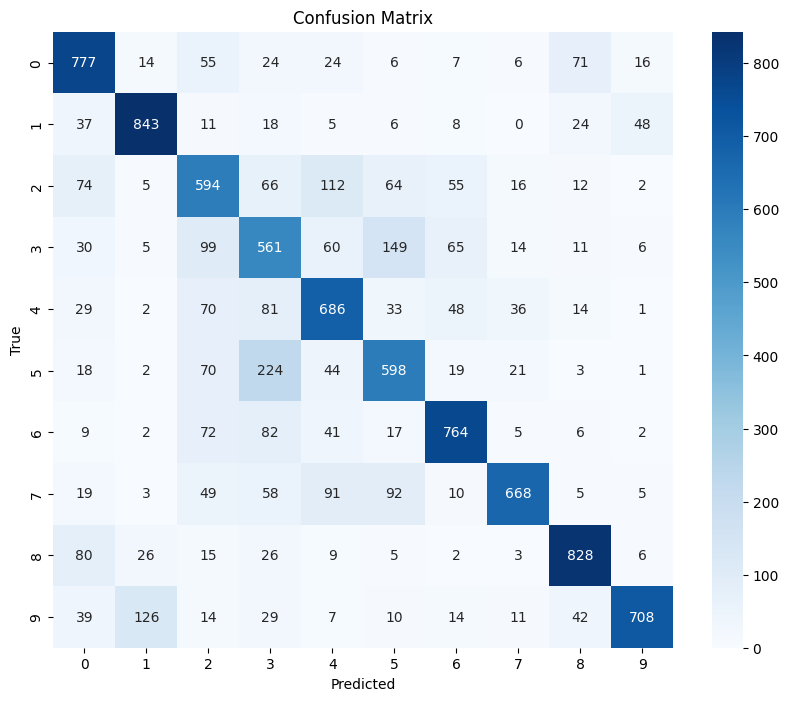

In [6]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()